**Environment Project A**

**Group 65 Members:** Kyra Ballard, Lauren Baker, Kaela Nelson

In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

In [2]:
def read_txt(filename):
    
    save_ls = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.split(',')
            for val in line:
                save_ls.append(val)
                
    return save_ls

In [3]:
def load_data(path):
    
    data = read_txt(path)
    data = [float(data[i]) for i in range(len(data)-1)]
    
    return data

In [4]:
def create_timestamp(data, collection_freq, start_year, start_month, start_day, start_hour, start_min):
    
    start_date = datetime.datetime(start_year, start_month, start_day, hour=start_hour, minute=start_min)
    dates = [start_date]
    
    for i in range(len(data)-1): 
        dates.append(dates[i] + datetime.timedelta(minutes=collection_freq))
    
    return dates

In [5]:
def build_df(dates_list, data_list, data_name):
    
    df = pd.DataFrame()
    
    for i in range(len(data_list)):
        df_temp = pd.DataFrame({'date': dates_list[i], data_name : data_list[i]})
        df = df.append(df_temp, ignore_index = True)
        
    return df

In [6]:
def find_rows(df, day_of_interest):
    
    rows = []
    for i in range(df.shape[0]):
        if df.date[i].day == day_of_interest:
            rows.append(i)
            
    return rows

In [7]:
def plot_days(df, data_name, rows, label):
    
    # Create x axis based on hour of day
    x_plot = []
    for i in range(df.shape[0]):
        x_vals = df.date[i].hour + df.date[i].minute/60
        x_plot.append(x_vals)
        
    # Plot hour of day vs. data value
    plt.scatter(x_plot[rows[0]:rows[0]+len(rows)], df[data_name].values[rows],  
                label = label, alpha = 0.5, cmap = 'RdPu')

    # Label plot
    plt.xlabel('Hour of Day', fontsize = 15)
    plt.ylabel('Data Value', fontsize = 15)
    plt.legend()
    
    return x_plot

## Motion

In [8]:
data_name = 'motion'
collection_freq = 1/60 # in mins

In [9]:
data_1 = load_data('data_1\CS109a_motion.txt')
data_2 = load_data('data_2\CS109a_motion.txt')
data_3 = load_data('data_3\CS109a_motion.txt')
data_4 = load_data('data_4\CS109a_motion.txt')
data_5 = load_data('data_5\CS109a_motion.txt')
data_6 = load_data('data_6\CS109a_motion.txt')

In [10]:
dates_1 = create_timestamp(data_1, collection_freq, 2019, 10, 29, 22, 36)
dates_2 = create_timestamp(data_2, collection_freq, 2019, 11, 1, 9, 14)
dates_3 = create_timestamp(data_3, collection_freq, 2019, 11, 6, 20, 15)
dates_4 = create_timestamp(data_4, collection_freq, 2019, 11, 8, 9, 5)
dates_5 = create_timestamp(data_5, collection_freq, 2019, 11, 10, 13, 51)
dates_6 = create_timestamp(data_6, collection_freq, 2019, 11, 13, 18, 45)

In [11]:
dates_list = [dates_1, dates_2, dates_3, dates_4, dates_5, dates_6]
data_list = [data_1, data_2, data_3, data_4, data_5, data_6]

df = build_df(dates_list, data_list, data_name)

In [19]:
# rows_Oct29 = find_rows(df,29)
# rows_Oct30 = find_rows(df,30)
# rows_Oct31 = find_rows(df,31)
# rows_Nov1 = find_rows(df,1)
# rows_Nov2 = find_rows(df,2)
# rows_Nov3 = find_rows(df,3)
# rows_Nov6 = find_rows(df,6)
# rows_Nov7 = find_rows(df,7)
# rows_Nov8 = find_rows(df,8)
# rows_Nov9 = find_rows(df,9)
# rows_Nov10 = find_rows(df,10)
# rows_Nov11 = find_rows(df,11)
# rows_Nov12 = find_rows(df,12)
# rows_Nov13 = find_rows(df,13)
# rows_Nov14 = find_rows(df,14)
# rows_Nov15 = find_rows(df,15)
# rows_Nov16 = find_rows(df,16)

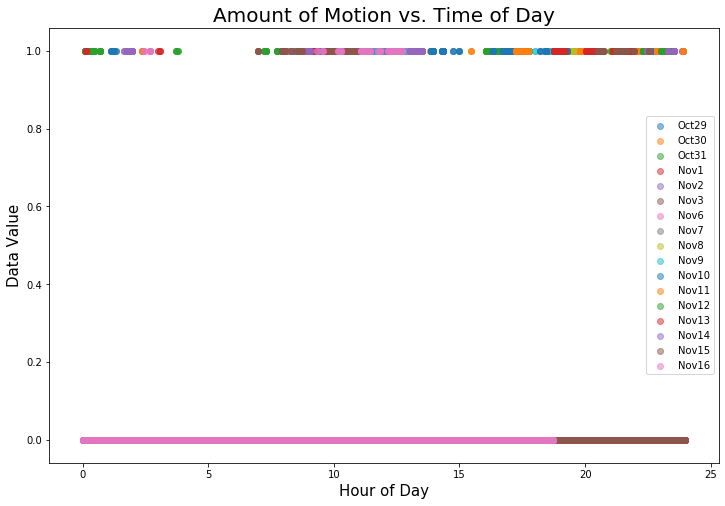

In [20]:
# plt.subplots(figsize = (12,8))

# plot_days(df, data_name, rows_Oct29, 'Oct29')
# plot_days(df, data_name, rows_Oct30, 'Oct30')
# plot_days(df, data_name, rows_Oct31, 'Oct31')
# plot_days(df, data_name, rows_Nov1, 'Nov1')
# plot_days(df, data_name, rows_Nov2, 'Nov2')
# plot_days(df, data_name, rows_Nov3, 'Nov3')
# plot_days(df, data_name, rows_Nov6, 'Nov6')
# plot_days(df, data_name, rows_Nov7, 'Nov7')
# plot_days(df, data_name, rows_Nov8, 'Nov8')
# plot_days(df, data_name, rows_Nov9, 'Nov9')
# plot_days(df, data_name, rows_Nov10, 'Nov10')
# plot_days(df, data_name, rows_Nov11, 'Nov11')
# plot_days(df, data_name, rows_Nov12, 'Nov12')
# plot_days(df, data_name, rows_Nov13, 'Nov13')
# plot_days(df, data_name, rows_Nov14, 'Nov14')
# plot_days(df, data_name, rows_Nov15, 'Nov15')
# plot_days(df, data_name, rows_Nov16, 'Nov16')
# plt.title('Amount of Motion vs. Time of Day', fontsize = 20)
# plt.show()

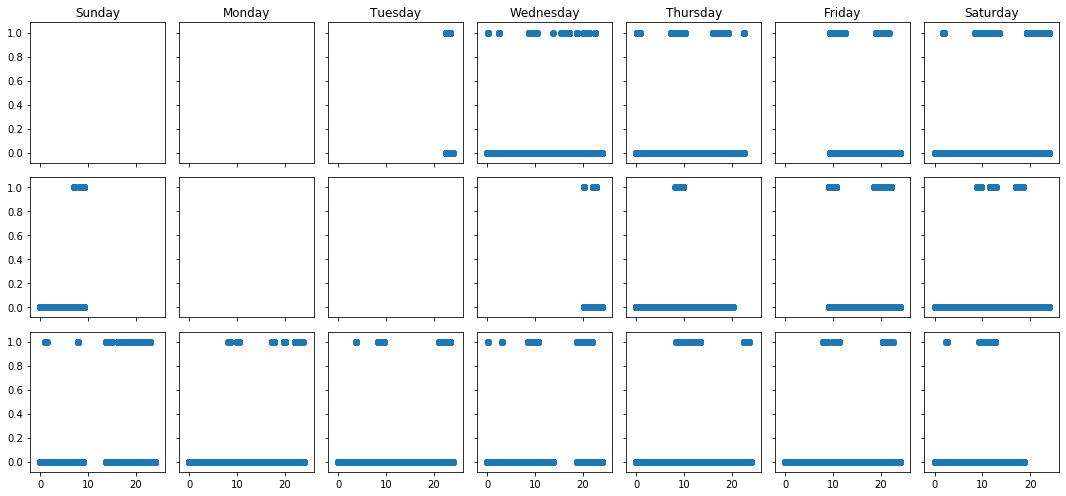

In [22]:
# Make subplots by day

# fig, ax = plt.subplots(3,7, figsize = (15,7), sharex=True, sharey=True)

# rows_week1 = [rows_Oct29, rows_Oct30, rows_Oct31, rows_Nov1, rows_Nov2] # missed 27th and 28th
# rows_week2 = [rows_Nov3, rows_Nov6, rows_Nov7, rows_Nov8, rows_Nov9] # missed 4th and 5th
# rows_week3 = [rows_Nov10, rows_Nov11, rows_Nov12, rows_Nov13, rows_Nov14, rows_Nov15, rows_Nov16]

# x_plot = []
# for i in range(df.shape[0]):
#     x_vals = df.date[i].hour + df.date[i].minute/60
#     x_plot.append(x_vals)

# for i in range(len(rows_week1)):
#     ax[0,i+2].scatter(x_plot[rows_week1[i][0]:rows_week1[i][0] + len(rows_week1[i])], df[data_name].values[rows_week1[i]])
#     ax[0,0].set_title('Sunday')
#     ax[0,1].set_title('Monday')
#     ax[0,2].set_title('Tuesday')
#     ax[0,3].set_title('Wednesday')
#     ax[0,4].set_title('Thursday')
#     ax[0,5].set_title('Friday')
#     ax[0,6].set_title('Saturday')

# ax[1,0].scatter(x_plot[rows_week2[0][0]:rows_week2[0][0] + len(rows_week2[0])], df[data_name].values[rows_week2[0]])
# for i in range(1,len(rows_week2)):
#     ax[1,i+2].scatter(x_plot[rows_week2[i][0]:rows_week2[i][0] + len(rows_week2[i])], df[data_name].values[rows_week2[i]])

# for i in range(len(rows_week3)):
#     ax[2,i].scatter(x_plot[rows_week3[i][0]:rows_week3[i][0] + len(rows_week3[i])], df[data_name].values[rows_week3[i]])

# plt.tight_layout()
# plt.show()